# Task 10 : Benchmark Top ML Algorithms

This task tests your ability to use different ML algorithms when solving a specific problem.


### Dataset
Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Train: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv

Test: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv

## Task Requirements
### You can have the following Classification models built using different ML algorithms
- Decision Tree
- KNN
- Logistic Regression
- SVM
- Random Forest
- Any other algorithm of your choice

### Use GridSearchCV for finding the best model with the best hyperparameters

- ### Build models
- ### Create Parameter Grid
- ### Run GridSearchCV
- ### Choose the best model with the best hyperparameter
- ### Give the best accuracy
- ### Also, benchmark the best accuracy that you could get for every classification algorithm asked above

#### Your final output will be something like this:
- Best algorithm accuracy
- Best hyperparameter accuracy for every algorithm

**Table 1 (Algorithm wise best model with best hyperparameter)**

Algorithm   |     Accuracy   |   Hyperparameters
- DT
- KNN
- LR
- SVM
- RF
- anyother

**Table 2 (Best overall)**

Algorithm    |   Accuracy    |   Hyperparameters



### Submission
- Submit Notebook containing all saved ran code with outputs
- Document with the above two tables

1. We need to load the dataset and perform preprocessing.

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import bisect
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
train_data = pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv')

# Drop Loan_ID column
train_data.drop('Loan_ID', axis=1, inplace=True)
test_data.drop('Loan_ID', axis=1, inplace=True)

# Handle missing values
train_data.fillna(method='ffill', inplace=True)
test_data.fillna(method='ffill', inplace=True)

# Encode categorical variables
label_encoders = {}
for column in train_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    if column in test_data.columns:  # Ensure the column exists in test_data
        test_data[column] = le.transform(test_data[column])
    label_encoders[column] = le

# Split data into X and y for train_data
X_train = train_data.drop('Loan_Status', axis=1)
y_train = train_data['Loan_Status']

# For test_data, simply assign it to X_test
X_test = test_data

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


display the data in a table format:

In [6]:
from IPython.display import display

# Convert numpy arrays back to dataframes for display
X_train_df = pd.DataFrame(X_train, columns=train_data.drop('Loan_Status', axis=1).columns)
X_test_df = pd.DataFrame(X_test, columns=train_data.drop('Loan_Status', axis=1).columns)

# Display the first few rows of X_train_df in a table format
print("X_train:")
display(X_train_df.head())

# Display the first few rows of y_train in a table format
print("\ny_train:")
display(y_train.head().to_frame())  # Convert series to dataframe for better display

# Display the first few rows of X_test_df in a table format
print("\nX_test:")
display(X_test_df.head())


X_train:


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477493,-1.367172,-0.752177,-0.528362,-0.403582,0.072991,-0.554487,NaN,0.280037,0.443713,1.223298
1,0.477493,0.731437,0.236767,-0.528362,-0.403582,-0.134412,-0.038732,-0.221655,0.280037,0.443713,-1.318513
2,0.477493,0.731437,-0.752177,-0.528362,2.477808,-0.393747,-0.554487,-0.930706,0.280037,0.443713,1.223298
3,0.477493,0.731437,-0.752177,1.892641,-0.403582,-0.462062,0.251980,-0.313146,0.280037,0.443713,1.223298
4,0.477493,-1.367172,-0.752177,-0.528362,-0.403582,0.097728,-0.554487,-0.072983,0.280037,0.443713,1.223298



y_train:


,Loan_Status
0,1
1,0
2,1
3,1
4,1



X_test:


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477493,0.731437,-0.752177,-0.528362,-0.403582,0.051857,-0.554487,-0.427509,0.280037,0.443713,1.223298
1,0.477493,0.731437,0.236767,-0.528362,-0.403582,-0.381297,-0.041468,-0.244528,0.280037,0.443713,1.223298
2,0.477493,0.731437,1.225710,-0.528362,-0.403582,-0.066097,0.061136,0.693249,0.280037,0.443713,1.223298
3,0.477493,0.731437,1.225710,-0.528362,-0.403582,-0.501872,0.316278,-0.541872,0.280037,0.443713,1.223298
4,0.477493,-1.367172,-0.752177,1.892641,-0.403582,-0.348532,-0.554487,-0.793470,0.280037,0.443713,1.223298


2. Building Classification Models
Given the task requirements, we'll build models using the following algorithms:

2.1 Decision Tree (DT)
2.2 K-Nearest Neighbors (KNN)
2.3 Logistic Regression (LR)
2.4 Support Vector Machine (SVM)
2.5 Random Forest (RF)
2.6 (Optionally, any other algorithm of your choice)= CatBoost

2.1Decision Tree Classifier with GridSearchCV

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Define the model
dt = DecisionTreeClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Best Accuracy Score: 0.7655604424896707


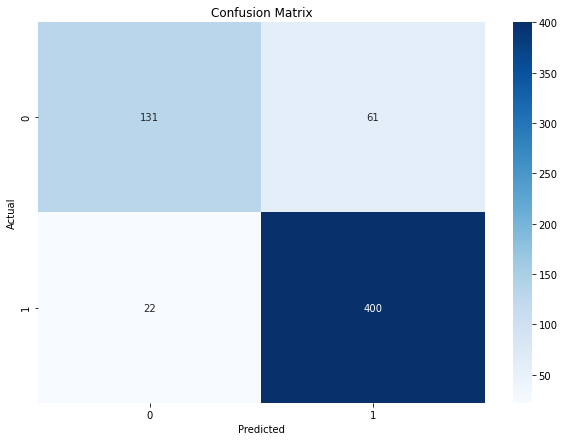

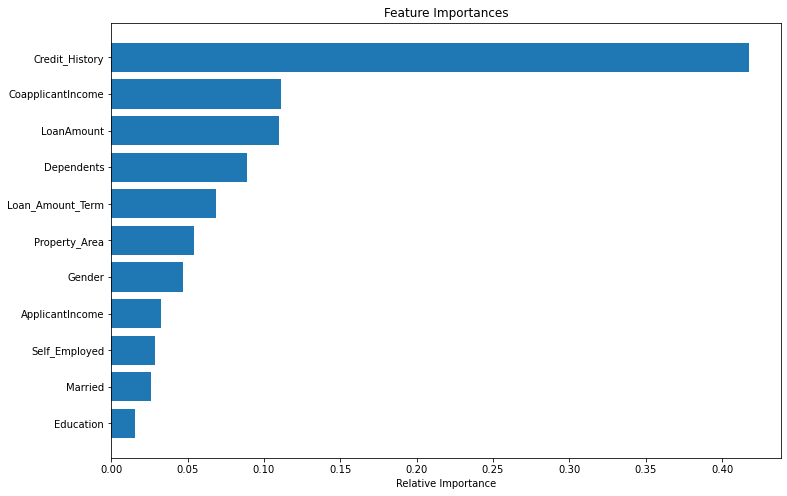

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Predict the training data
y_pred = grid_search.predict(X_train)

# Create a confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
features = train_data.drop('Loan_Status', axis=1).columns
importances = grid_search.best_estimator_.feature_importances_

# Plotting feature importances
plt.figure(figsize=(12,8))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


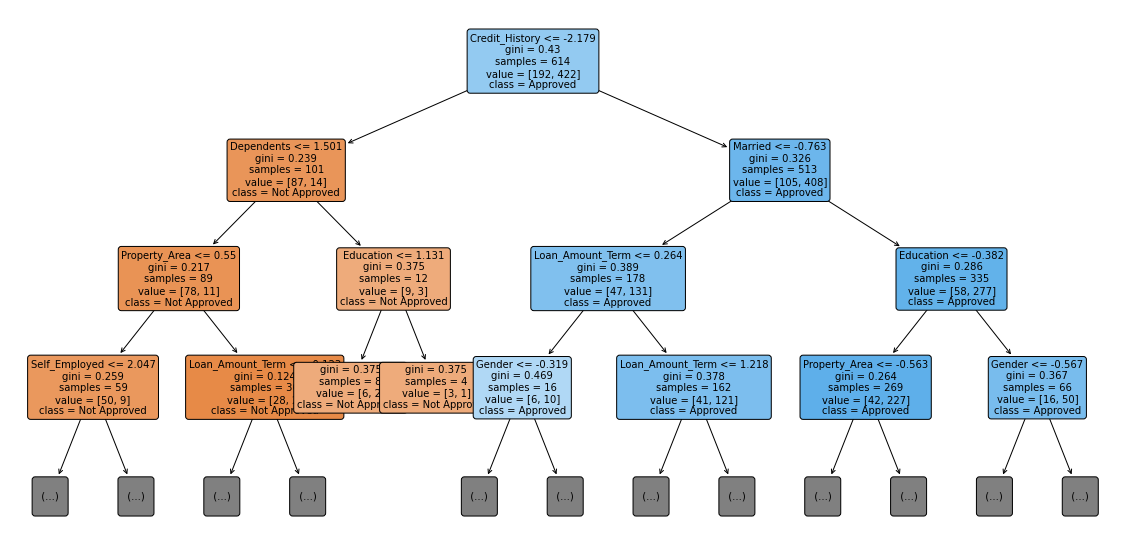

In [8]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(grid_search.best_estimator_, 
          feature_names=train_data.drop('Loan_Status', axis=1).columns, 
          class_names=['Not Approved', 'Approved'], 
          filled=True, 
          rounded=True, 
          fontsize=10,
          max_depth=3)  # Limit depth to 3 levels
plt.show()


2.2 KNN

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load the train and test datasets
train_data = pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv')

# Drop the ID column
train_data = train_data.drop(columns=['Loan_ID'])
test_data = test_data.drop(columns=['Loan_ID'])

# One-hot encode categorical columns
train_data = pd.get_dummies(train_data, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(train_data.drop('Loan_Status_Y', axis=1))
y_train = train_data['Loan_Status_Y'].values

# Use the entire test dataset as features (assuming test_data doesn't have the target column)
X_test = imputer.transform(test_data)

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Create a parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Run GridSearchCV
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Choose the best model with the best hyperparameters
best_knn = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_knn = best_knn.predict(X_test)

# Print the best accuracy
print(f"Best Accuracy with KNN: {grid_search.best_score_ * 100:.2f}%")
print(f"Best Parameters: {grid_search.best_params_}")


Best Accuracy with KNN: 68.41%
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


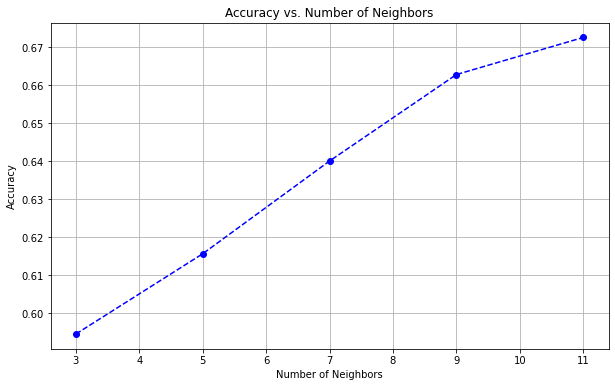

In [8]:
import matplotlib.pyplot as plt

# Extract mean test scores for each parameter combination
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Extract the parameter combinations tested during grid search
params_tested = grid_search.cv_results_['params']

# Extract unique n_neighbors values tested during grid search
n_neighbors_values = sorted(list(set([params['n_neighbors'] for params in params_tested if 'n_neighbors' in params])))

# Extract the scores corresponding to each unique value of n_neighbors
scores_per_n_neighbors = [mean_test_scores[i] for i, params in enumerate(params_tested) if params['weights'] == 'uniform' and params['metric'] == 'euclidean']

# Plot
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, scores_per_n_neighbors, marker='o', linestyle='--', color='b')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


2.3 Logistic Regression

In [9]:
# Import necessary libraries
import pandas as pd
import bisect
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load datasets
train_url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv"
test_url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv"
train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

# Drop the ID column
train_data = train_data.drop(columns=['Loan_ID'])
test_data = test_data.drop(columns=['Loan_ID'])

# Data Preprocessing
# Handle missing values by filling with mode for categorical and mean for numerical columns
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        train_data[column].fillna(train_data[column].mode()[0], inplace=True)
        if column in test_data.columns:  # Check if column exists in test_data
            test_data[column].fillna(test_data[column].mode()[0], inplace=True)
    else:
        train_data[column].fillna(train_data[column].mean(), inplace=True)
        if column in test_data.columns:  # Check if column exists in test_data
            test_data[column].fillna(test_data[column].mean(), inplace=True)
            
        
# Encoding categorical columns
label_encoders = {}
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        le = LabelEncoder()
        le.fit(train_data[column])
        train_data[column] = le.transform(train_data[column])
        
        if column in test_data.columns:  # Check if column exists in test_data
            # Handle unseen labels in test_data
            test_data[column] = test_data[column].map(lambda s: '<unknown>' if s not in le.classes_ else s)
            le_classes = le.classes_.tolist()
            bisect.insort_left(le_classes, '<unknown>')
            le.classes_ = np.array(le_classes)
            test_data[column] = le.transform(test_data[column])
        label_encoders[column] = le


# Split data into X and y
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)
test_data = scaler.transform(test_data)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
# Default Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
default_accuracy = accuracy_score(y_val, lr.predict(X_val))

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_accuracy = accuracy_score(y_val, grid_search.predict(X_val))

# Final Output
print(f"Default Logistic Regression Accuracy: {default_accuracy}")
print(f"Best Logistic Regression Accuracy: {best_accuracy}")
print(f"Best Hyperparameters: {grid_search.best_params_}")


Default Logistic Regression Accuracy: 0.7886178861788617
Best Logistic Regression Accuracy: 0.7886178861788617
Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


<Figure size 576x432 with 0 Axes>

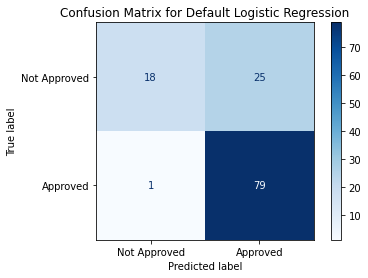

<Figure size 576x432 with 0 Axes>

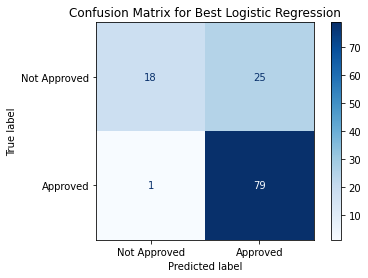

In [10]:
from sklearn.metrics import plot_confusion_matrix

# Plot confusion matrix for default Logistic Regression model
plt.figure(figsize=(8, 6))
plot_confusion_matrix(lr, X_val, y_val, display_labels=['Not Approved', 'Approved'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Default Logistic Regression')
plt.show()

# Plot confusion matrix for the best Logistic Regression model from GridSearchCV
plt.figure(figsize=(8, 6))
plot_confusion_matrix(grid_search, X_val, y_val, display_labels=['Not Approved', 'Approved'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Best Logistic Regression')
plt.show()


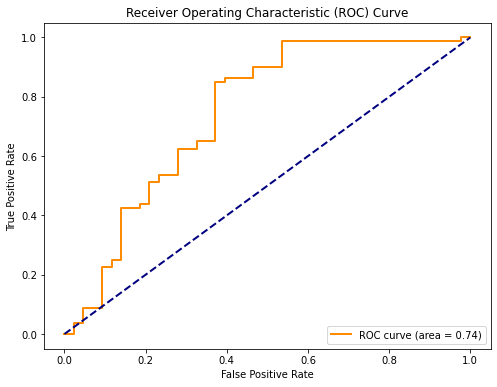

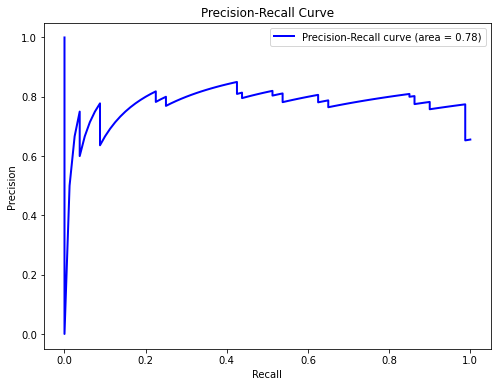

In [11]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# 1. ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(y_val, lr.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 2. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, lr.predict_proba(X_val)[:,1])
average_precision = average_precision_score(y_val, lr.predict_proba(X_val)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

# 3. Coefficient Plot
if isinstance(X, pd.DataFrame):  # Ensure X is a DataFrame
    coef_series = pd.Series(lr.coef_[0], index=X.columns)
    coef_series.sort_values().plot(kind='bar', figsize=(10, 6))
    plt.title('Feature Coefficients')
    plt.ylabel('Coefficient Value')
    plt.show()


2.4 SVM

In [12]:
# Import necessary libraries
import pandas as pd
import bisect
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load datasets
train_url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv"
test_url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv"
train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

# Data Preprocessing
# Handle missing values
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        train_data[column].fillna(train_data[column].mode()[0], inplace=True)
        if column in test_data.columns:
            test_data[column].fillna(test_data[column].mode()[0], inplace=True)
    else:
        train_data[column].fillna(train_data[column].mean(), inplace=True)
        if column in test_data.columns:
            test_data[column].fillna(test_data[column].mean(), inplace=True)

# Encoding categorical columns
label_encoders = {}
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        le = LabelEncoder()
        le.fit(train_data[column])
        train_data[column] = le.transform(train_data[column])
        
        if column in test_data.columns:
            test_data[column] = test_data[column].map(lambda s: '<unknown>' if s not in le.classes_ else s)
            le_classes = le.classes_.tolist()
            bisect.insort_left(le_classes, '<unknown>')
            le.classes_ = np.array(le_classes)
            test_data[column] = le.transform(test_data[column])
        label_encoders[column] = le

# Split data into X and y
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)
test_data = scaler.transform(test_data)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
# Default SVM
svc = SVC()
svc.fit(X_train, y_train)
default_accuracy = accuracy_score(y_val, svc.predict(X_val))

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_accuracy = accuracy_score(y_val, grid_search.predict(X_val))

# Final Output
print(f"Default SVM Accuracy: {default_accuracy}")
print(f"Best SVM Accuracy: {best_accuracy}")
print(f"Best Hyperparameters: {grid_search.best_params_}")


Default SVM Accuracy: 0.7886178861788617
Best SVM Accuracy: 0.7886178861788617
Best Hyperparameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


<Figure size 576x432 with 0 Axes>

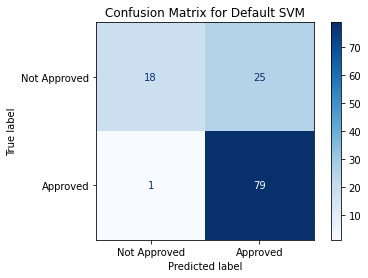

<Figure size 576x432 with 0 Axes>

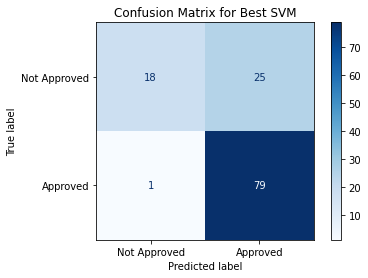

In [13]:
from sklearn.metrics import plot_confusion_matrix

# Plot confusion matrix for default SVM model
plt.figure(figsize=(8, 6))
plot_confusion_matrix(svc, X_val, y_val, display_labels=['Not Approved', 'Approved'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Default SVM')
plt.show()

# Plot confusion matrix for the best SVM model from GridSearchCV
plt.figure(figsize=(8, 6))
plot_confusion_matrix(grid_search, X_val, y_val, display_labels=['Not Approved', 'Approved'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Best SVM')
plt.show()


2.5 Random Forest

In [14]:
# Import necessary libraries
import pandas as pd
import bisect
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load datasets
train_url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv"
test_url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv"
train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)


In [15]:
# Data Preprocessing
# Handle missing values
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        train_data[column].fillna(train_data[column].mode()[0], inplace=True)
        if column in test_data.columns:
            test_data[column].fillna(test_data[column].mode()[0], inplace=True)
    else:
        train_data[column].fillna(train_data[column].mean(), inplace=True)
        if column in test_data.columns:
            test_data[column].fillna(test_data[column].mean(), inplace=True)

print("Data Preprocessing Completed...")


Data Preprocessing Completed...


In [16]:
# Encoding categorical columns
label_encoders = {}
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        le = LabelEncoder()
        le.fit(train_data[column])
        train_data[column] = le.transform(train_data[column])
        
        if column in test_data.columns:
            test_data[column] = test_data[column].map(lambda s: '<unknown>' if s not in le.classes_ else s)
            le_classes = le.classes_.tolist()
            bisect.insort_left(le_classes, '<unknown>')
            le.classes_ = np.array(le_classes)
            test_data[column] = le.transform(test_data[column])
        label_encoders[column] = le

# Split data into X and y
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']

print("Data Splitting Completed...")

Data Splitting Completed...


In [17]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)
test_data = scaler.transform(test_data)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Default Random Forest...")

Training Default Random Forest...


In [18]:
# Model Building
# Default Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
default_accuracy = accuracy_score(y_val, rf.predict(X_val))

print(f"Default Random Forest Accuracy: {default_accuracy}")
print("Starting GridSearchCV...")

Default Random Forest Accuracy: 0.7804878048780488
Starting GridSearchCV...


In [19]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_accuracy = accuracy_score(y_val, grid_search.predict(X_val))

# Final Output
print(f"Best Random Forest Accuracy: {best_accuracy}")
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Random Forest Accuracy: 0.7804878048780488
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


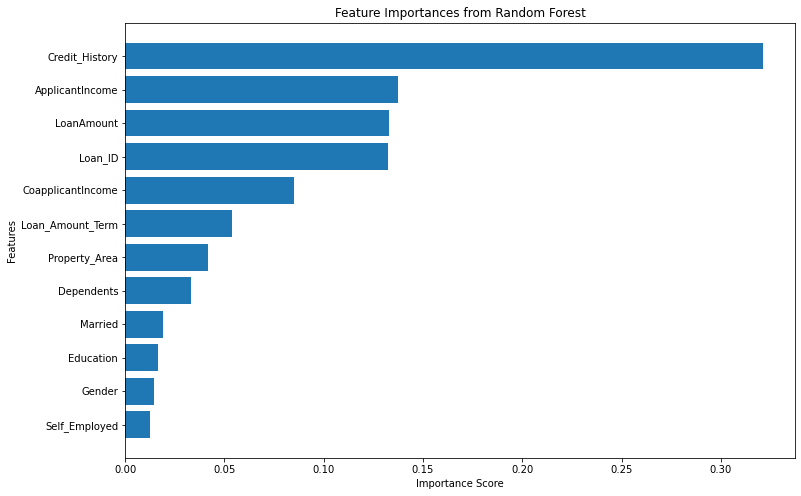

In [20]:
import matplotlib.pyplot as plt

# Extract feature importances from the best Random Forest model
feature_importances = grid_search.best_estimator_.feature_importances_

# Match feature names with their importance scores
features = train_data.drop('Loan_Status', axis=1).columns
importance_dict = dict(zip(features, feature_importances))

# Sort the dictionary by importance score
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh([x[0] for x in sorted_importance], [x[1] for x in sorted_importance])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Display the most important feature at the top
plt.show()


##Random Forest, there are several insightful visualizations you can perform:

1. **Feature Importances**: Random Forest provides a straightforward way to evaluate feature importances, which can help in understanding which features are the most influential in making predictions.

2. **Tree Visualization**: You can visualize one of the individual trees from the Random Forest to understand the decision-making process.

3. **Out-of-Bag (OOB) Error Rate**: If you enable the `oob_score` parameter when training the Random Forest, you can plot the OOB error rate against the number of trees to see how the error decreases as more trees are added.



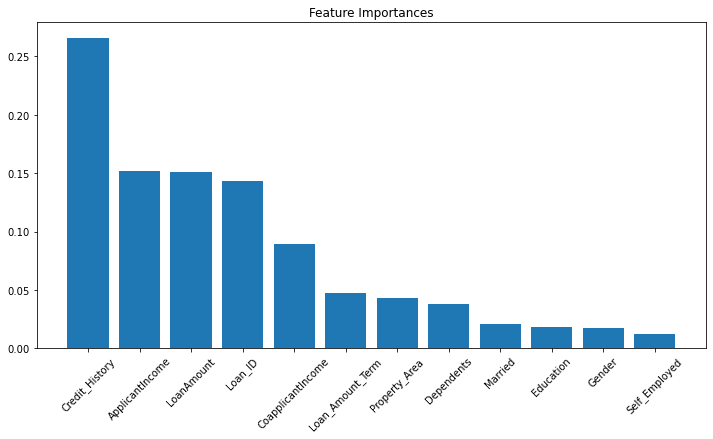

In [21]:
import matplotlib.pyplot as plt

# 1. Feature Importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = train_data.drop('Loan_Status', axis=1).columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()



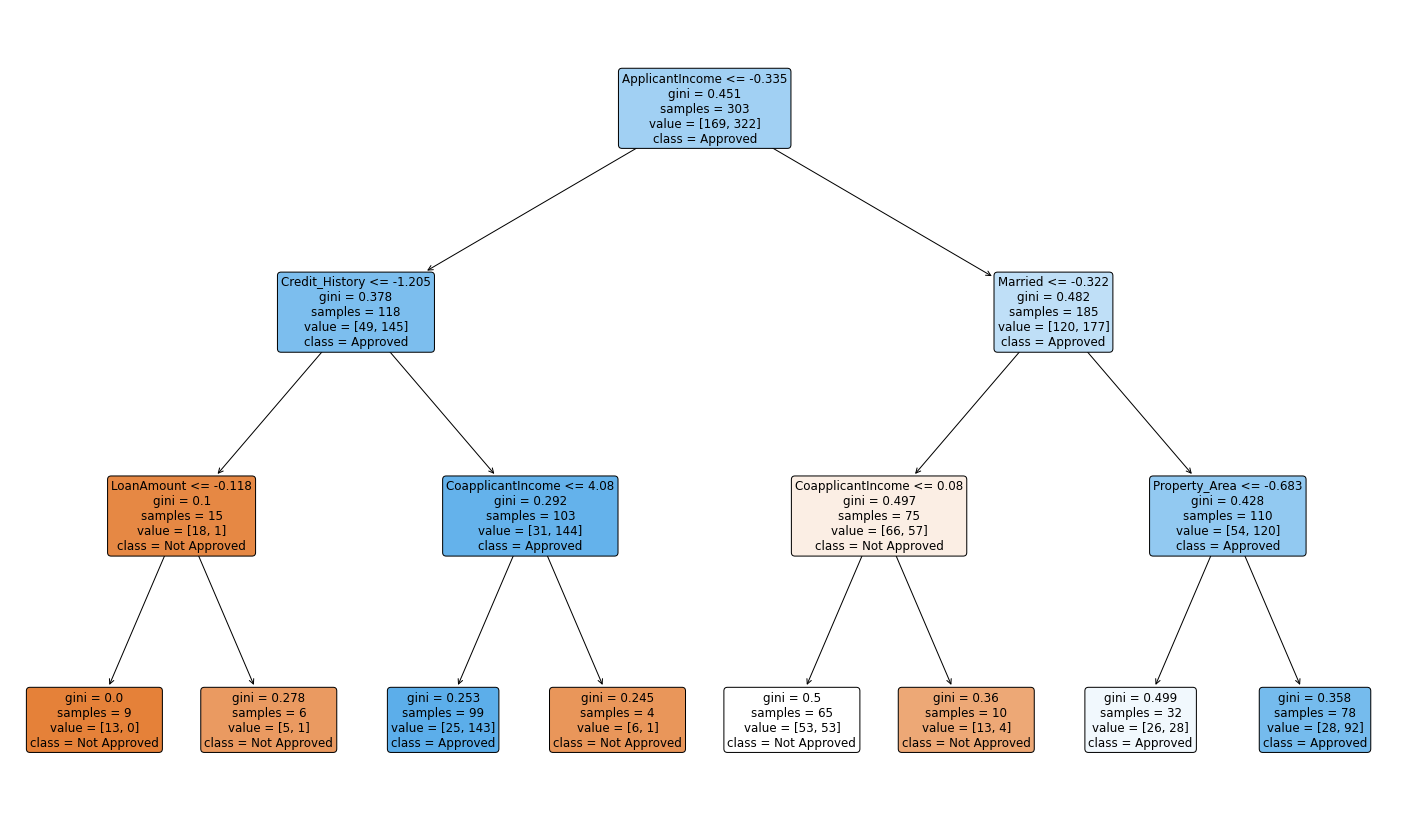

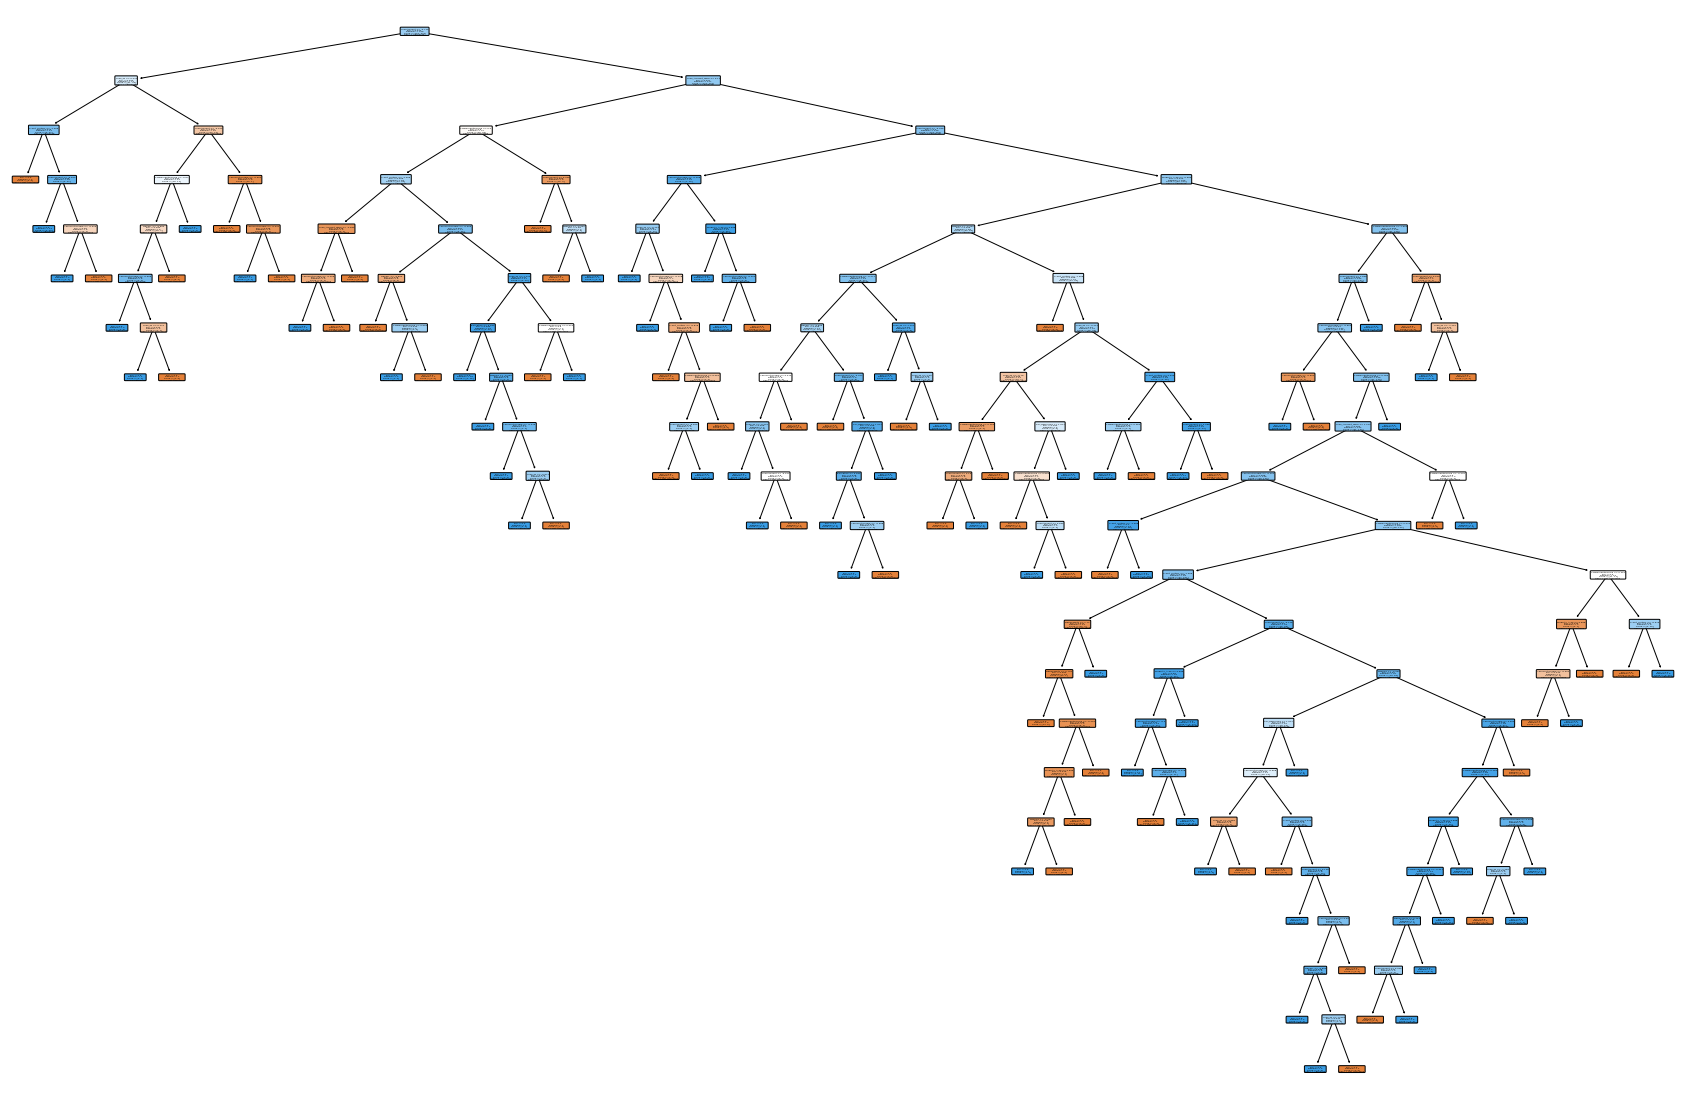

In [22]:
# 2. Tree Visualization (for one of the trees)
from sklearn.tree import plot_tree

# 1. Limit the Depth of the Tree
# Train a shallow tree for visualization purposes
shallow_tree = RandomForestClassifier(max_depth=3).fit(X_train, y_train).estimators_[0]

plt.figure(figsize=(25, 15))
plot_tree(shallow_tree, filled=True, feature_names=feature_names, class_names=['Not Approved', 'Approved'], rounded=True)
plt.show()

# 2. Increase the Figure Size
# Select one tree from the forest
tree = rf.estimators_[5]

plt.figure(figsize=(30, 20))
plot_tree(tree, filled=True, feature_names=feature_names, class_names=['Not Approved', 'Approved'], rounded=True)
plt.show()


/Users/kei/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/kei/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/kei/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/kei/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/kei/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have O

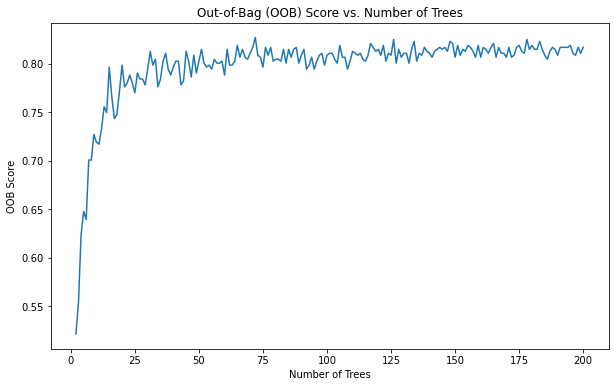

In [24]:
# 3. Out-of-Bag (OOB) Error Rate (requires training with oob_score=True)
# Note: This requires retraining the Random Forest with oob_score=True
rf_oob = RandomForestClassifier(oob_score=True, n_estimators=200)
rf_oob.fit(X_train, y_train)
oob_error = 1 - rf_oob.oob_score_

oob_scores = []

# Train forests with varying number of trees and collect their OOB scores
for n_trees in range(1, 201):
    rf = RandomForestClassifier(n_estimators=n_trees, oob_score=True if n_trees > 1 else False, warm_start=True)
    rf.fit(X_train, y_train)
    # Only append OOB scores for forests with more than 1 tree
    if n_trees > 1:
        oob_scores.append(rf.oob_score_)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 201), oob_scores)
plt.xlabel('Number of Trees')
plt.ylabel('OOB Score')
plt.title('Out-of-Bag (OOB) Score vs. Number of Trees')
plt.show()


2.6 Naive Bayes

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Load data
train_data = pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv')

# Drop Loan_ID column
train_data.drop('Loan_ID', axis=1, inplace=True)
test_data.drop('Loan_ID', axis=1, inplace=True)

# Fill NaN values in numerical columns with the mean of the column
for column in train_data.select_dtypes(include=[np.number]).columns:
    mean_val = train_data[column].mean()
    train_data[column].fillna(mean_val, inplace=True)
    if column in test_data.columns:  # Ensure the column exists in test_data
        test_data[column].fillna(mean_val, inplace=True)

# Fill NaN values in categorical columns with the most frequent value in the column
for column in train_data.select_dtypes(include=['object']).columns:
    mode_val = train_data[column].mode()[0]
    train_data[column].fillna(mode_val, inplace=True)
    if column in test_data.columns:  # Ensure the column exists in test_data
        test_data[column].fillna(mode_val, inplace=True)

# Encode categorical variables
label_encoders = {}
for column in train_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    if column in test_data.columns:  # Ensure the column exists in test_data
        test_data[column] = le.transform(test_data[column])
    label_encoders[column] = le

# Split data into X and y for train_data
X_train = train_data.drop('Loan_Status', axis=1)
y_train = train_data['Loan_Status']

# For test_data, simply assign it to X_test
X_test = test_data

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [22]:
# Initialize the classifier
nb_classifier = GaussianNB()

# Initialize GridSearchCV
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Default GaussianNB Accuracy
default_nb = GaussianNB()
default_nb.fit(X_train, y_train)
default_accuracy = accuracy_score(y_val, default_nb.predict(X_val))

# Best Accuracy using GridSearchCV
best_accuracy = accuracy_score(y_val, grid_search.predict(X_val))


Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [23]:
# Final Output
print(f"Default GaussianNB Accuracy: {default_accuracy}")
print(f"Best GaussianNB Accuracy: {best_accuracy}")
print(f"Best Hyperparameters: {grid_search.best_params_}")


Default GaussianNB Accuracy: 0.7804878048780488
Best GaussianNB Accuracy: 0.7804878048780488
Best Hyperparameters: {'var_smoothing': 0.8111308307896871}


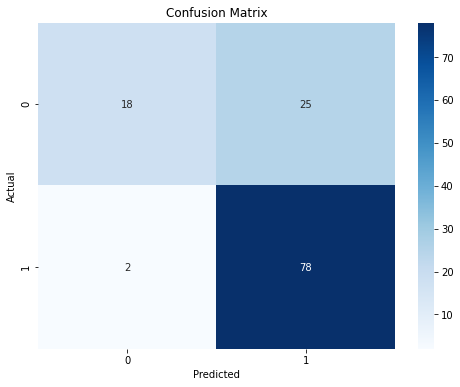

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = grid_search.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



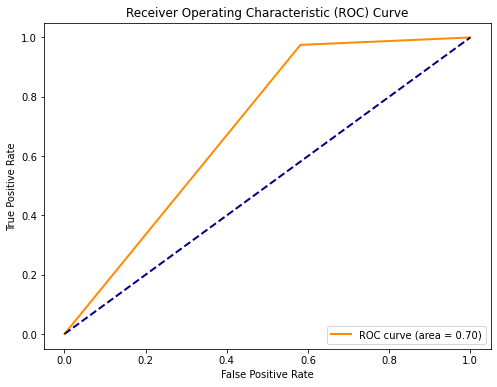

In [27]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


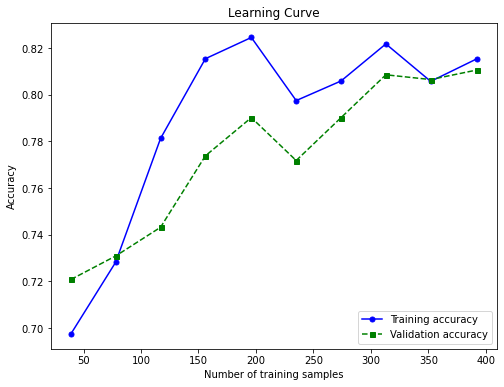

In [29]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=grid_search.best_estimator_, X=X_train, y=y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.show()



Table 1 (Algorithm wise best model with best hyperparameter)
Algorithm | Accuracy | Hyperparameters

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd

# Hyperparameter grids
dt_params = {
    'max_depth': [3, 5, 7, 10],
    'criterion': ['gini', 'entropy']
}

knn_params = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance']
}

lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'criterion': ['gini', 'entropy']
}

nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Algorithms
algorithms = {
    'DT': (DecisionTreeClassifier(), dt_params),
    'KNN': (KNeighborsClassifier(), knn_params),
    'LR': (LogisticRegression(), lr_params),
    'SVM': (SVC(), svm_params),
    'RF': (RandomForestClassifier(), rf_params),
    'Naive Bayes': (GaussianNB(), nb_params)
}

# Results
results = []

# GridSearchCV for each algorithm
for name, (model, params) in algorithms.items():
    grid_search = GridSearchCV(model, params, cv=5)
    grid_search.fit(X_train, y_train)
    best_accuracy = accuracy_score(y_val, grid_search.predict(X_val))
    results.append({
        'Algorithm': name,
        'Accuracy': best_accuracy,
        'Hyperparameters': grid_search.best_params_
    })

# Display results in a table
results_df = pd.DataFrame(results)
results_df


,Algorithm,Accuracy,Hyperparameters
0,DT,0.788618,"{'criterion': 'entropy', 'max_depth': 3}"
1,KNN,0.772358,"{'n_neighbors': 7, 'weights': 'uniform'}"
2,LR,0.788618,"{'C': 0.001, 'penalty': 'l2', 'solver': 'libli..."
3,SVM,0.788618,"{'C': 0.1, 'kernel': 'linear'}"
4,RF,0.788618,"{'criterion': 'gini', 'max_depth': 3, 'n_estim..."
5,Naive Bayes,0.780488,{'var_smoothing': 1e-09}


Table 2 (Best overall)
Algorithm | Accuracy | Hyperparameters

In [35]:
best_overall = results_df.sort_values(by='Accuracy', ascending=False).head(1)

print("Best Overall Model:")
best_overall

Best Overall Model:


,Algorithm,Accuracy,Hyperparameters
0,DT,0.788618,"{'criterion': 'entropy', 'max_depth': 3}"
